# Exploratory Data Analysis (Retail Sales Dataset)

In [1]:
import pandas as pd

In [22]:
df = pd.read_csv("https://raw.githubusercontent.com/Data-Navigators/Statistical_Concept_Excercise/main/data/Retail_sales_dataset.csv")

In [8]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


# Descriptive Statistics for Numerical Columns

Look at the mean, min, max, and std (standard deviation) values for each numerical variable.

Take note of any large discrepancies (e.g., high standard deviation, significant differences between mean and median).



In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


numerical_cols = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']
desc_stats = df[numerical_cols].describe()

mean = desc_stats.loc['mean']
median = df[numerical_cols].median()
mode = df[numerical_cols].mode().iloc[0]  # Get the first mode
skewness = df[numerical_cols].skew()
kurtosis = df[numerical_cols].kurtosis()

# Create a summary DataFrame for better visualization
summary_stats = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Mode': mode,
    'Skewness': skewness,
    'Kurtosis': kurtosis
})

print("Descriptive Statistics:")
print(desc_stats)

print("\nSummary of Additional Statistics:")
print(summary_stats)

Descriptive Statistics:
              Age     Quantity  Price per Unit  Total Amount
count  1000.00000  1000.000000     1000.000000   1000.000000
mean     41.39200     2.514000      179.890000    456.000000
std      13.68143     1.132734      189.681356    559.997632
min      18.00000     1.000000       25.000000     25.000000
25%      29.00000     1.000000       30.000000     60.000000
50%      42.00000     3.000000       50.000000    135.000000
75%      53.00000     4.000000      300.000000    900.000000
max      64.00000     4.000000      500.000000   2000.000000

Summary of Additional Statistics:
                   Mean  Median  Mode  Skewness  Kurtosis
Age              41.392    42.0  43.0 -0.048812 -1.201212
Quantity          2.514     3.0   4.0 -0.014036 -1.392867
Price per Unit  179.890    50.0  50.0  0.736308 -1.138996
Total Amount    456.000   135.0  50.0  1.376128  0.815031


# Visualizing Distributions of Numerical Variables

Create histograms with KDE plots for numerical variables to visualize their distribution.

Observe the shape of each distribution (normal, skewed, etc.).

Identify any variables with significant skew or outliers.

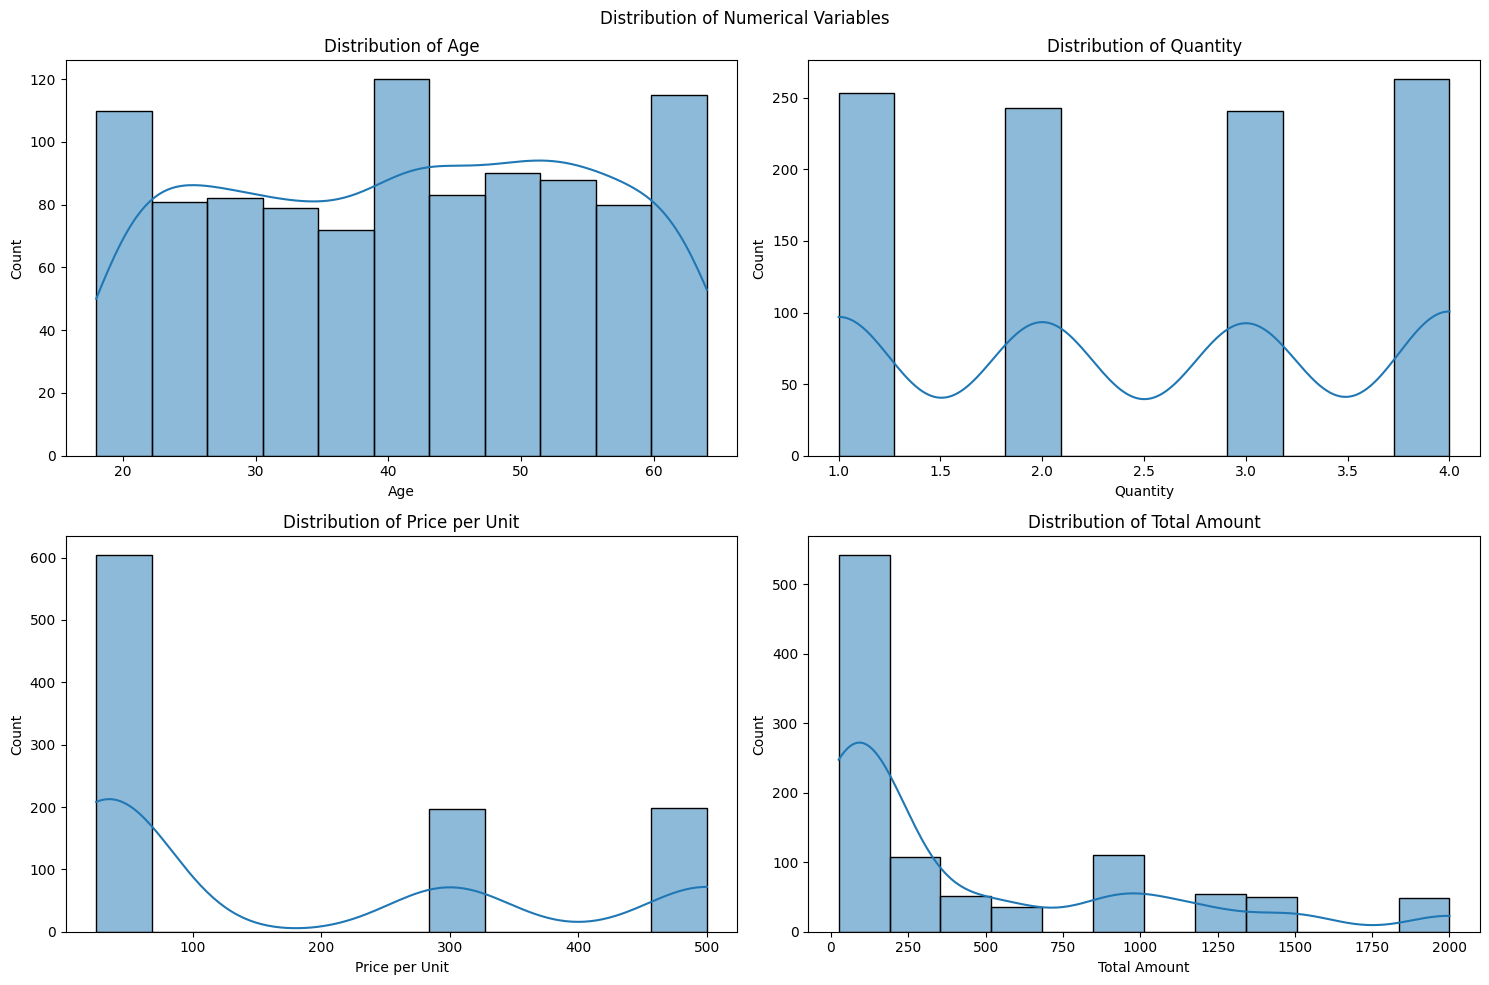

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Numerical Variables')

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], ax=axes[i//2, i%2], kde=True)
    axes[i//2, i%2].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Frequency Distribution of Categorical Variables

Visualize the frequency distribution of Gender and Product Category

For Gender, check if the data is balanced or if one gender is more represented.

For Product Category, look at which categories are most frequently purchased.


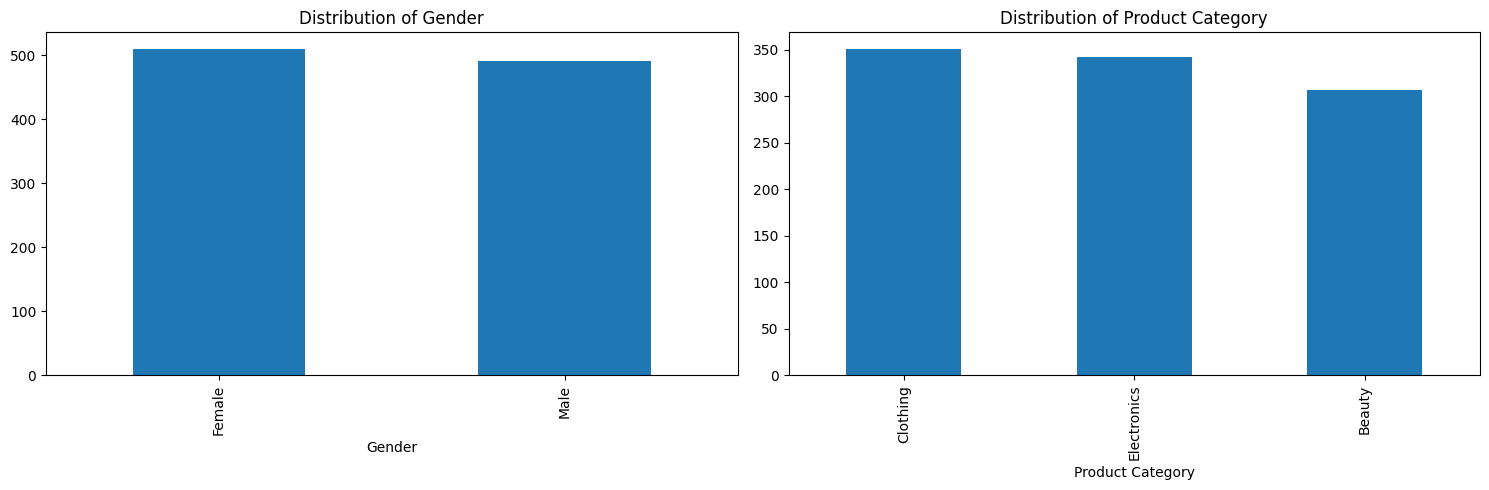

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

df['Gender'].value_counts().plot(kind='bar', ax=ax1, title='Distribution of Gender')
df['Product Category'].value_counts().plot(kind='bar', ax=ax2, title='Distribution of Product Category')

plt.tight_layout()
plt.show()

# Explore the relationship between customer age and total amount spent using a scatter plot.

Look for patterns in the scatter plot. Does spending increase or decrease with age?

Check if there are outliers or clusters of customers who spend significantly more or less.


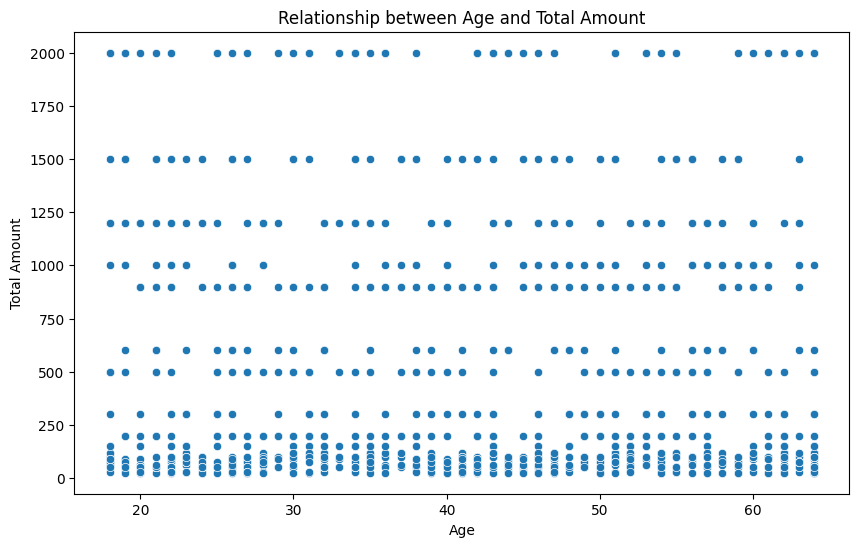

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Total Amount', data=df)
plt.title('Relationship between Age and Total Amount')
plt.show()

# Sales by Product Category

Analyze total sales for each product category.

Look at which product categories generate the most revenue.

Identify if a few categories dominate sales or if revenue is spread evenly across different categories.

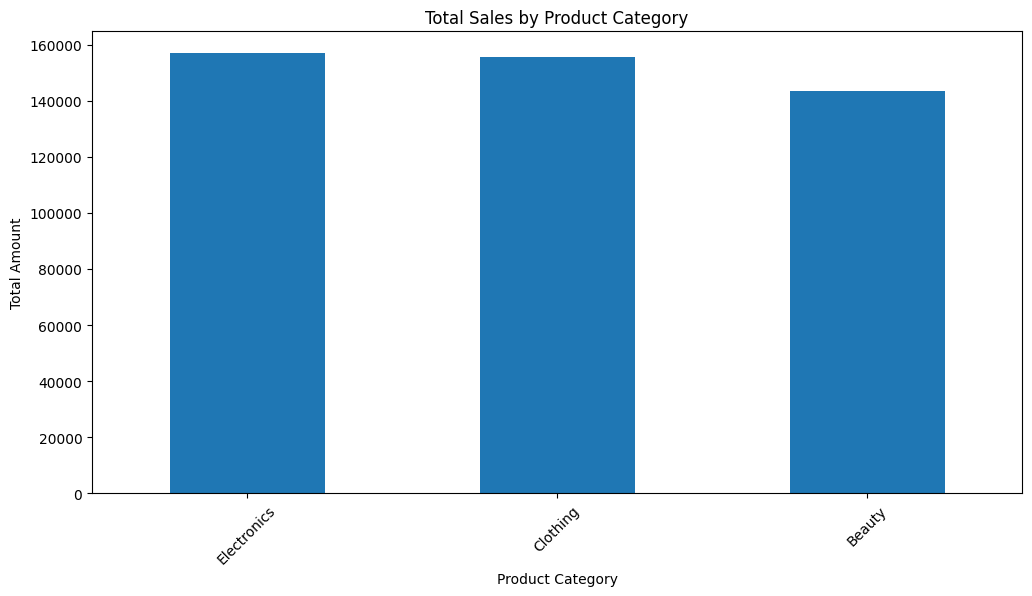

In [19]:
plt.figure(figsize=(12, 6))
df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Sales by Product Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

# Average Transaction Value by Gender

 Calculate and compare the average transaction value between genders.

In [20]:
avg_transaction = df.groupby('Gender')['Total Amount'].mean()
print("\nAverage Transaction Value by Gender:")
print(avg_transaction)


Average Transaction Value by Gender:
Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64
